<a href="https://colab.research.google.com/github/Lakvindu05/Exam-remark/blob/master/BenchMark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datasets import load_dataset, Audio, Dataset
dataset = load_dataset("Lingalingeswaran/combined_english_sinhala")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
!pip install torchcodec

train_en = dataset["test"].filter(lambda x: x["language"] == "en")
train_en = train_en.with_format("python")

In [3]:
decoded_samples = []

for i in range(len(train_en)):
    row = train_en[i]  # THIS forces actual decoding
    audio = row["audio"]  # now becomes a dict: {array, sampling_rate, path}

    arr = audio["array"]
    sr = audio["sampling_rate"]
    duration = len(arr) / sr

    decoded_samples.append({
        "audio": audio,
        "text": row["text"],
        "language": row["language"],
        "duration": duration
    })


In [4]:
train_en_final = Dataset.from_list(decoded_samples)
train_en_final[0]

{'audio': {'bytes': b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00\x0f\x00\x00\x03Lavf57.56.101\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xfb8\xc4\x00\x03\x06\xc0K\x0cd\x84\xce\x01J\rc\xc9\x8c08\x00\x14\xdb\xa2-\x91\x87\x82\r\x18h\xf0\xe0l\x04B\x88pV\xb3\x10\x03\x0f{\x17Yfa\x86\x8fL\x13\x15 kpG\xf2zz\x7f\xe6F\xb1\xff\xe3\xbf\xf1\xcd\x01\xb3\xff\xff\x8e\x01D\x86\nch`\x81\xcc\x00\x8e\x94\xd6pa\x10md\xb1\xa4\xc4vZ\xa3\xa3\x10\x83\x1a\xea\xb9/\xda\xec\xa1\xf1\x0c\xea\xb7\xaa\xe8\x87\xb0\x8c\xd0\xd8Xtl\xa1\x8f\xef\xb9\xc5[\xb9-r-^\xb1\xd4g\x065\xea\x13\xdc\xaf\xb1\x98\xb3W\xaf\xfe\xaf\xff\x90F~]\xbe\x9e\x85\x10\x02\x86\x037^.\x11\xc70\x98S$\x80\xa8\x80B+\xd2j\x0eL\xf7uKJ\xc3O\x85\xfa\xa2\x8a\xc7\x82t\x00\x8bq\x93!\xe9r3\x90\x95\x00\xd1\xda0\x91U"\x10\x17r$\xd7\xb1\xff\xfb8\xc4\x1d\x03\x0b\x80i\x1a,\xb0\xd0\x81s\x0c#I\x86%\xc0\xca\x14s\x19\x0f\n\xa4`\xc1\x81\xb7\xdc\xda\xfb;/{wu\xed\xfck)Z\xc2\x81xV\xc1\xcf\x15J\xac\xec!T@\xa9\x82\x04[\xc7\x95\xb03feB\xa0E\xc9\xeb$i\xe4H\x81\x97\xa1\xb

In [5]:
type(train_en_final)

datasets.arrow_dataset.Dataset

In [6]:
sorted_train_en = train_en_final.sort("duration", reverse=True)
longest_30 = sorted_train_en.select(range(30))

In [7]:
type(longest_30)

datasets.arrow_dataset.Dataset

In [8]:
import os

os.makedirs("benchmark_dataset/audio", exist_ok=True)

In [9]:
from pydub import AudioSegment
import numpy as np
import soundfile as sf
import io

for i, sample in enumerate(longest_30):

    # Extract mp3 bytes
    mp3_bytes = sample["audio"]["bytes"]

    # Decode MP3
    audio = AudioSegment.from_file(io.BytesIO(mp3_bytes), format="mp3")

    # Convert to mono
    audio = audio.set_channels(1)

    # Downsample to 8000 Hz (telephony)
    audio = audio.set_frame_rate(8000)

    # Convert to numpy array
    samples = np.array(audio.get_array_of_samples()).astype("float32") / (1 << 15)

    # Save to WAV file
    out_path = f"benchmark_dataset/audio/clip_{i}.wav"
    sf.write(out_path, samples, 8000)
    print("Saved:", out_path)


Saved: benchmark_dataset/audio/clip_0.wav
Saved: benchmark_dataset/audio/clip_1.wav
Saved: benchmark_dataset/audio/clip_2.wav
Saved: benchmark_dataset/audio/clip_3.wav
Saved: benchmark_dataset/audio/clip_4.wav
Saved: benchmark_dataset/audio/clip_5.wav
Saved: benchmark_dataset/audio/clip_6.wav
Saved: benchmark_dataset/audio/clip_7.wav
Saved: benchmark_dataset/audio/clip_8.wav
Saved: benchmark_dataset/audio/clip_9.wav
Saved: benchmark_dataset/audio/clip_10.wav
Saved: benchmark_dataset/audio/clip_11.wav
Saved: benchmark_dataset/audio/clip_12.wav
Saved: benchmark_dataset/audio/clip_13.wav
Saved: benchmark_dataset/audio/clip_14.wav
Saved: benchmark_dataset/audio/clip_15.wav
Saved: benchmark_dataset/audio/clip_16.wav
Saved: benchmark_dataset/audio/clip_17.wav
Saved: benchmark_dataset/audio/clip_18.wav
Saved: benchmark_dataset/audio/clip_19.wav
Saved: benchmark_dataset/audio/clip_20.wav
Saved: benchmark_dataset/audio/clip_21.wav
Saved: benchmark_dataset/audio/clip_22.wav
Saved: benchmark_data

In [10]:
with open("benchmark_dataset/transcripts.txt", "w") as f:
    for i, sample in enumerate(longest_30):
        text = sample["text"].lower().strip()
        f.write(f"clip_{i}.wav|{text}\n")

# Bench Marking

In [11]:
AUDIO_DIR = "benchmark_dataset/audio"
TRANSCRIPT_PATH = "benchmark_dataset/transcripts.txt"

In [12]:
# Load transcripts into a dict
gt = {}
with open(TRANSCRIPT_PATH, "r") as f:
    for line in f:
        fname, text = line.strip().split("|")
        gt[fname] = text

In [13]:
!pip install -U openai-whisper
!pip install jiwer

import whisper
import time
from jiwer import wer

def benchmark_model(model_name):
    model = whisper.load_model(model_name)

    results = []

    for fname, text in gt.items():

        audio_path = os.path.join(AUDIO_DIR, fname)

        start = time.time()
        pred = model.transcribe(audio_path, fp16=False)
        end = time.time()

        latency = end - start
        prediction = pred["text"].lower().strip()
        error = wer(text, prediction)

        results.append({
            "file": fname,
            "gt": text,
            "pred": prediction,
            "wer": error,
            "latency": latency
        })

    return results

In [14]:
tiny_results = benchmark_model("tiny")

100%|█████████████████████████████████████| 72.1M/72.1M [00:00<00:00, 99.5MiB/s]


In [18]:
import pandas as pd

df_tiny = pd.DataFrame(tiny_results)

print("model Tiny")
# print(df_tiny[["gt","pred","wer", "latency"]])

print("---------WER------------")
print(df_tiny["wer"].min())
print(df_tiny["wer"].max())

print("---------Latency------------")
print(df_tiny["latency"].min())
print(df_tiny["latency"].max())

print("---------avg------------")
print(df_tiny["wer"].mean())
print(df_tiny["latency"].mean())

model Tiny
---------WER------------
0.0
1.0
---------Latency------------
0.23651361465454102
6.44463038444519
---------avg------------
0.35169830169830174
0.5403914213180542


In [17]:
base_results = benchmark_model("base")

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 113MiB/s]


In [19]:
df_base = pd.DataFrame(base_results)

print("model Base")
# print(df_base[["gt","pred","wer", "latency"]])

print("---------WER------------")
print(df_base["wer"].min())
print(df_base["wer"].max())

print("---------Latency------------")
print(df_base["latency"].min())
print(df_base["latency"].max())

print("---------avg------------")
print(df_base["wer"].mean())
print(df_base["latency"].mean())

model Base
---------WER------------
0.0
1.2307692307692308
---------Latency------------
0.2815842628479004
6.729886054992676
---------avg------------
0.2849206349206349
0.6008258024851482


In [20]:
small_results = benchmark_model("small")

100%|███████████████████████████████████████| 461M/461M [00:05<00:00, 94.7MiB/s]


In [21]:
df_small = pd.DataFrame(small_results)

print("model small")
# print(df_small[["gt","pred","wer", "latency"]])

print("---------WER------------")
print(df_small["wer"].min())
print(df_small["wer"].max())

print("---------Latency------------")
print(df_small["latency"].min())
print(df_small["latency"].max())

print("---------avg------------")
print(df_small["wer"].mean())
print(df_small["latency"].mean())

model small
---------WER------------
0.0
1.1538461538461537
---------Latency------------
0.56064772605896
8.388113975524902
---------avg------------
0.23708143708143709
0.9441491603851319


In [29]:
medium_results = benchmark_model("medium")

In [32]:
df_medium = pd.DataFrame(medium_results)

print("model medium")
# print(df_small[["gt","pred","wer", "latency"]])

print("---------WER------------")
print(df_medium["wer"].min())
print(df_medium["wer"].max())

print("---------Latency------------")
print(df_medium["latency"].min())
print(df_medium["latency"].max())

print("---------avg------------")
print(df_medium["wer"].mean())
print(df_medium["latency"].mean())

model medium
---------WER------------
0.0
0.6363636363636364
---------Latency------------
1.2690165042877197
18.082358837127686
---------avg------------
0.12448847448847447
2.1014957507451375


In [33]:
large_results = benchmark_model("large")

100%|██████████████████████████████████████| 2.88G/2.88G [00:30<00:00, 101MiB/s]


In [34]:
df_large = pd.DataFrame(large_results)

print("model Large")
# print(df_small[["gt","pred","wer", "latency"]])

print("---------WER------------")
print(df_large["wer"].min())
print(df_large["wer"].max())

print("---------Latency------------")
print(df_large["latency"].min())
print(df_large["latency"].max())

print("---------avg------------")
print(df_large["wer"].mean())
print(df_large["latency"].mean())

model Large
---------WER------------
0.0
1.4615384615384615
---------Latency------------
2.017378807067871
26.877158403396606
---------avg------------
0.16859714359714362
3.13574055035909


In [35]:
df_tiny["model"] = "tiny"
df_base["model"] = "base"
df_small["model"] = "small"
df_medium["model"] = "medium"
df_large["model"] = "large"

df_all = pd.concat([df_tiny, df_base, df_small, df_medium, df_large], ignore_index=True)

In [36]:
wer_by_file = df_all.pivot(index="file", columns="model", values="wer")
lat_by_file = df_all.pivot(index="file", columns="model", values="latency")

<Figure size 1400x600 with 0 Axes>

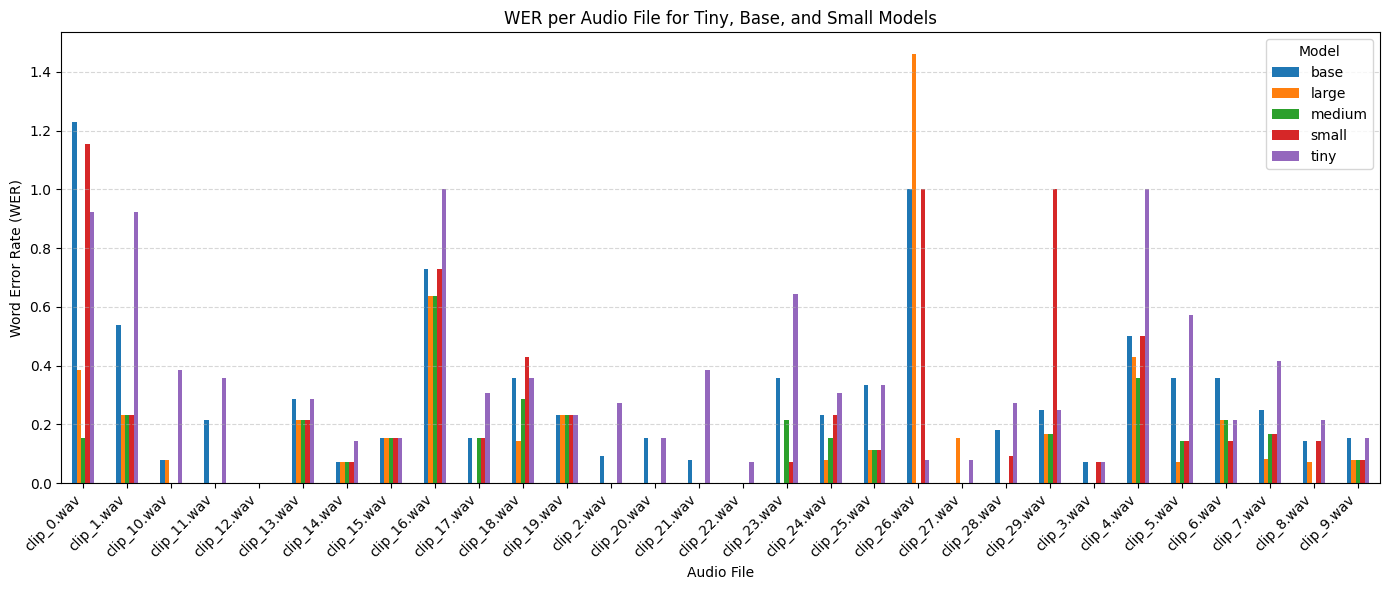

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

wer_by_file.plot(kind="bar", figsize=(14,6))

plt.title("WER per Audio File for Tiny, Base, and Small Models")
plt.ylabel("Word Error Rate (WER)")
plt.xlabel("Audio File")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


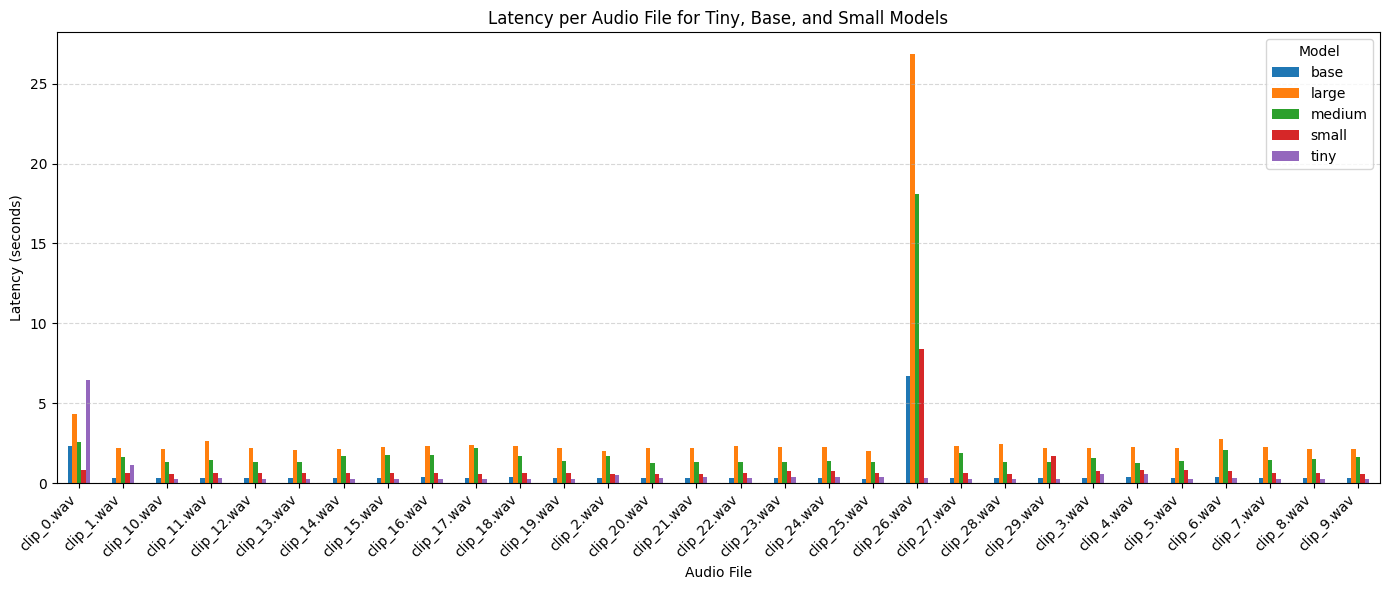

In [39]:
import matplotlib.pyplot as pltl

lat_by_file.plot(kind="bar", figsize=(14,6))

plt.title("Latency per Audio File for Tiny, Base, and Small Models")
plt.ylabel("Latency (seconds)")
plt.xlabel("Audio File")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.tight_layout()
plt.show()
